# Problem 2.1

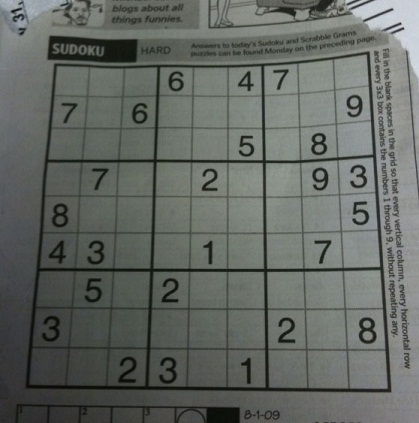

In [4]:
# 1) Loading image
import cv2
from google.colab.patches import cv2_imshow
# last argument 1 is for rgb, 0 is for grayscale
img = cv2.imread('sudoku-original.png',1)
#print(img.shape)
cv2_imshow(img)

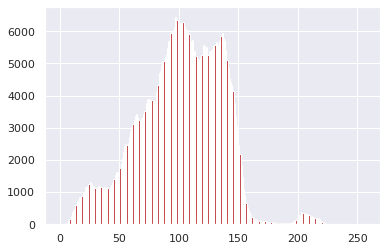

In [244]:
# 2) Plotting histogram of intensities
import numpy as np
import matplotlib.pyplot as plt

_=plt.hist(img.flatten(),256,[0,256], color = 'r')

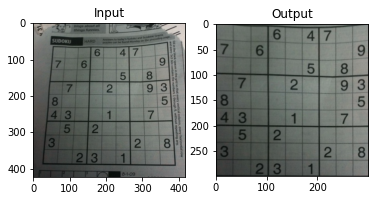

In [6]:
# 3) Perspective transform

rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

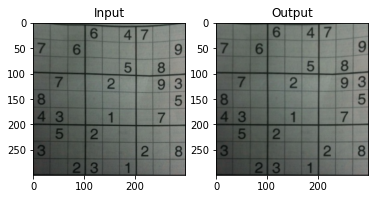

In [7]:

pts3 = np.float32([[0,0],[200,5],[0,300],[300,300]])
pts4 = np.float32([[0,0],[200,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts3,pts4)

dst2 = cv2.warpPerspective(dst,M,(300,300))

plt.subplot(121),plt.imshow(dst),plt.title('Input')
plt.subplot(122),plt.imshow(dst2),plt.title('Output')
plt.show()

# Problem 2.2

In [ ]:
#Loading data
import pandas as pd
from datetime import datetime, timedelta  

energyData = pd.read_csv('energydata_complete.csv')
energyData.describe() 

In [109]:
#Checking for rows with null values
energyData[energyData.isnull().any(axis=1)] 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption


In [ ]:
# energyData

In [12]:
#len(energyData[energyData['Appliances']<400])

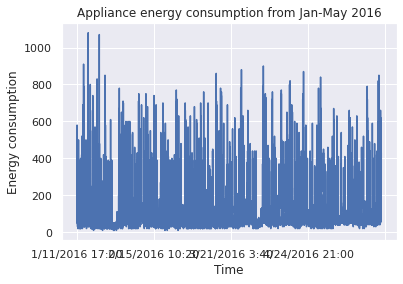

In [111]:
# 1a) Plotting the appliance energy consumption for whole period

fig,axes=plt.subplots(1,1)

axes.plot(energyData["date"],energyData["Appliances"])
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.set_title("Appliance energy consumption from Jan-May 2016")
axes.set_xlabel("Time")
axes.set_ylabel("Energy consumption")
plt.show()

In [120]:
# 1b) Plotting the appliance energy consumption for the first week in Jan

energyData['date'] = pd.to_datetime(energyData['date'])
energyData['day'] = energyData['date'].dt.date
energyData['time'] = energyData['date'].dt.time
energyData['hour'] = energyData['date'].dt.hour


startDate = energyData["date"][0]
endDate = energyData["date"][0] + timedelta(days=7)  

fig,axes=plt.subplots(1,1)

# energyDataWeek = energyData.loc[(energyData['date'] >= startDate) & (energyData['date'] <= endDate)]

axes.plot(energyData["date"],energyData["Appliances"])
axes.xaxis.set_major_locator(MaxNLocator(5)) 

axes.set_xlim(left = startDate, right = endDate)
axes.set_title("Appliance energy consumption from Jan 11-18, 2016")
axes.set_xlabel("Time")
axes.set_ylabel("Energy consumption")
plt.show()


In [138]:
# startDateIndex = np.int(energyData[energyData['date']==startDate].index.values)
# endDateIndex = np.int(energyData[energyData['date']==endDate].index.values)
# energyData_np = energyData.to_numpy()
# print(energyData_np.shape)
# energyData_np[startDateIndex:endDateIndex,0:2]
# energyDataWeek['date']
# energyDataWeek = energyData.loc[(energyData['date'] >= startDate) & (energyData['date'] <= endDate)]
# energyDataWeek['date'] = pd.DatetimeIndex(energyDataWeek['date'])
# energyDataWeek['day'] = pd.DatetimeIndex(energyDataWeek['date']).date
# energyDataWeek['hour'] = pd.DatetimeIndex(energyDataWeek['date']).hour
# energyDataWeek['day']

In [ ]:
# Data for first available week in Jan
energyDataWeek = energyData.loc[(energyData['date'] >= startDate) & (energyData['date'] <= endDate)]


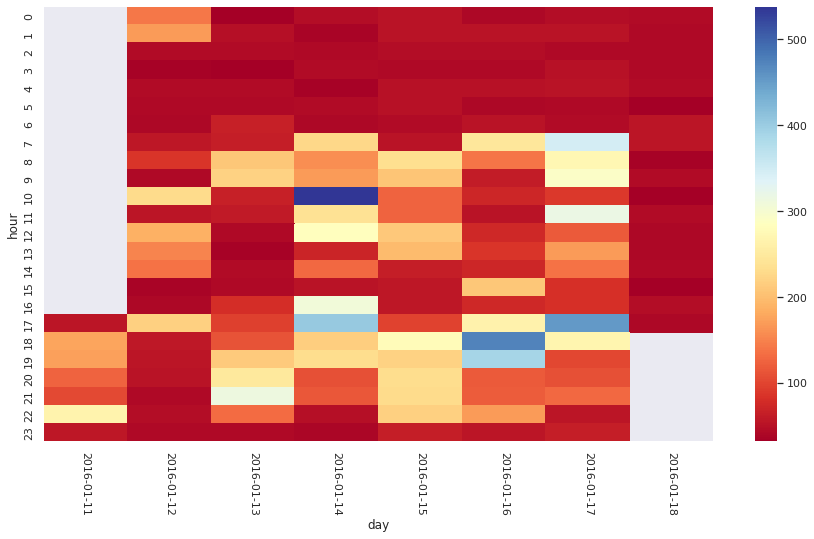

In [144]:
# 2) Heatmap of weekly data

import seaborn as sns


days = pd.DataFrame(energyDataWeek['day'].unique())
heatmap_pt = pd.pivot_table(energyDataWeek, values='Appliances', index=['hour'], columns='day')
fig, ax = plt.subplots(figsize=(15,8))
sns.set()
ax = sns.heatmap(heatmap_pt, cmap='RdYlBu')
# ax.set_xticklabels(days[0].dt.strftime('%d-%m-%Y'))
plt.xticks(rotation=-90)
plt.show()

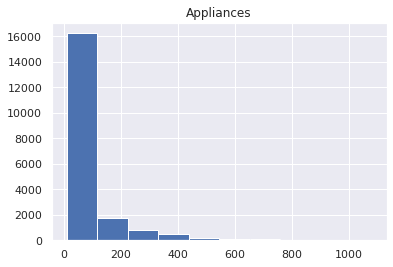

In [145]:
# 3) Histogram of energy consumption of appliances

from matplotlib import pyplot
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
energyData.hist(column = ['Appliances'], bins = 10)
pyplot.show()

In [175]:
# 4) Energy consumption vs. NSM

energyData['date'][0].replace(hour=0, minute=0, second=0)
energyData['midnight'] = energyData['date'].apply(lambda x: x.replace(hour=0, minute=0, second=0))
energyData['NSM'] = ((energyData['date'] - energyData['midnight'])/ pd.Timedelta('1 second')).astype(int)
plt.scatter(energyData['NSM'], energyData['Energy Consumption'])
plt.xlabel("Seconds from midnight")
plt.ylabel("Energy consumption")
plt.show()

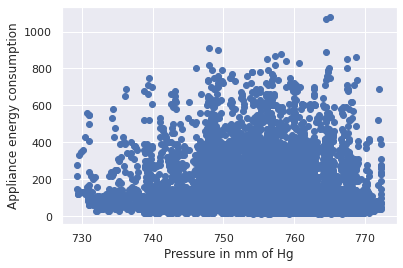

In [188]:
# 5) Energy consumption vs. Press mm Hg

plt.scatter(energyData['Press_mm_hg'], energyData['Appliances'])
plt.xlabel("Pressure in mm of Hg")
plt.ylabel("Appliance energy consumption")
plt.show()

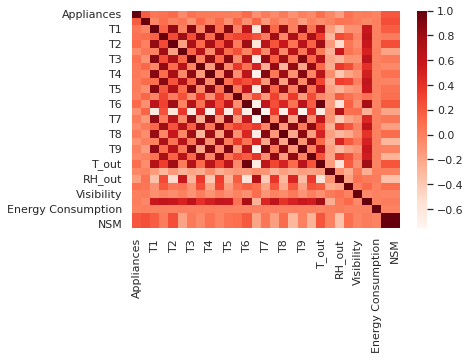

In [217]:
# 6) Correlation mapping

corrMatrix = energyData.corr()
# rankedFeatureList = corrMatrix.unstack().sort_values()
# rankedFeatureList = rankedFeatureList[rankedFeatureList<1]
# rankedFeatureList
sns.heatmap(corrMatrix, annot=False, cmap=plt.cm.Reds)
plt.show()

In [215]:
abs(corrMatrix['Energy Consumption']).sort_values()
#based on correlation coeff, NSM and Press_mm_Hg are not the most significant features. But if a physical reasoning is made that they are the significant contributors then appropriate weights have to be assigned to those features.

RH_3                  0.000477
lights                0.000521
RH_1                  0.000699
Press_mm_hg           0.000699
T9                    0.001227
RH_4                  0.001787
T4                    0.001815
RH_7                  0.001820
RH_9                  0.002955
T8                    0.003210
T7                    0.003900
Tdewpoint             0.003950
RH_8                  0.004480
T3                    0.005194
T5                    0.005490
Visibility            0.005889
T1                    0.006203
RH_2                  0.006275
RH_5                  0.011056
T2                    0.011087
Appliances            0.011145
Windspeed             0.011342
RH_6                  0.011671
hour                  0.013185
NSM                   0.013390
T6                    0.015086
T_out                 0.015259
RH_out                0.020441
Energy Consumption    1.000000
Name: Energy Consumption, dtype: float64

In [208]:
# energyData.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Energy Consumption', 'day', 'time', 'hour',
       'midnight', 'NSM'],
      dtype='object')

#Problem 2.3

In [219]:
# Loading the dat file
airfoilData = np.loadtxt('airfoil_self_noise.dat', unpack = True)

In [223]:
# Converting np array to dataframe
airfoilData_df =  pd.DataFrame(airfoilData.transpose(), columns = ['Frequency (Hz)','Angle of attack (degrees)','Chord length (metres)','Free-stream velocity (m/s)','Suction side displacement thickness (meters)','Scaled sound pressure (decibels)'])

In [228]:
#Summary stats
airfoilData_df.describe()

,Frequency (Hz),Angle of attack (degrees),Chord length (metres),Free-stream velocity (m/s),Suction side displacement thickness (meters),Scaled sound pressure (decibels)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [229]:
# 1) Mean
airfoilData_df.mean()

Frequency (Hz)                                  2886.380572
Angle of attack (degrees)                          6.782302
Chord length (metres)                              0.136548
Free-stream velocity (m/s)                        50.860745
Suction side displacement thickness (meters)       0.011140
Scaled sound pressure (decibels)                 124.835943
dtype: float64

In [235]:
# 2) Variance
airfoilData_df.var()

Frequency (Hz)                                  9.938717e+06
Angle of attack (degrees)                       3.502424e+01
Chord length (metres)                           8.749868e-03
Free-stream velocity (m/s)                      2.425116e+02
Suction side displacement thickness (meters)    1.729287e-04
Scaled sound pressure (decibels)                4.759146e+01
dtype: float64

In [236]:
# 3) Median
airfoilData_df.median()

Frequency (Hz)                                  1600.000000
Angle of attack (degrees)                          5.400000
Chord length (metres)                              0.101600
Free-stream velocity (m/s)                        39.600000
Suction side displacement thickness (meters)       0.004957
Scaled sound pressure (decibels)                 125.721000
dtype: float64

In [237]:
# 4) Kurtosis
airfoilData_df.kurtosis()

Frequency (Hz)                                  5.708685
Angle of attack (degrees)                      -0.412951
Chord length (metres)                          -1.037964
Free-stream velocity (m/s)                     -1.563951
Suction side displacement thickness (meters)    2.218903
Scaled sound pressure (decibels)               -0.314187
dtype: float64

In [238]:
# 5) Skew
airfoilData_df.skew()

Frequency (Hz)                                  2.137084
Angle of attack (degrees)                       0.689164
Chord length (metres)                           0.457457
Free-stream velocity (m/s)                      0.235852
Suction side displacement thickness (meters)    1.702165
Scaled sound pressure (decibels)               -0.418952
dtype: float64

In [240]:
# 6) Range
airfoilData_df.max()-airfoilData_df.min()

Frequency (Hz)                                  19800.000000
Angle of attack (degrees)                          22.200000
Chord length (metres)                               0.279400
Free-stream velocity (m/s)                         39.600000
Suction side displacement thickness (meters)        0.058011
Scaled sound pressure (decibels)                   37.607000
dtype: float64